In [0]:
## "importing software libraries"
import numpy as np
import torch
from torch.autograd import Variable

In [11]:
## that's just a funny way of how we retrieve test data
!git clone https://github.com/WolfgangWaltenberger/oeawai.git

fatal: destination path 'oeawai' already exists and is not an empty directory.


In [0]:
## now we have lots of data in "x_data", the truth is stored in "y_data"
x_data, y_data = torch.load ( "oeawai/studienstiftung/data.p" )

In [0]:
## This is the "class" where the neural network is defined

class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        ## a linear layer, we have two neurons as input, one as output
        self.linear = torch.nn.Linear(2, 1) # 2 in and 1 out
        
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [0]:
# we have to instantiate the class, create an object
model = Model()

In [0]:
# here we define our loss function ...
criterion = torch.nn.BCELoss(reduction="mean")
# .... and our gradient descent method!
adam = torch.optim.Adam(model.parameters(), lr=0.001)

In [0]:
# Training loop
for epoch in range(1000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data)
    
    # Compute and print loss
    loss = criterion(y_pred, y_data)
    # print(epoch, loss_adam.data, loss_sgd.data)
    
    # Zero gradients, perform a backward pass, and update the weights.
    adam.zero_grad()
    loss.backward()
    adam.step()

In [0]:
## The rest of the code is just plotting!

w_adam = list(model.parameters())
w_adam0 = w_adam[0].data.numpy()
w_adam1 = w_adam[1].data.numpy()

In [0]:
import matplotlib.pyplot as plt

Final gradient descend, adam: [Parameter containing:
tensor([[1.0179, 0.8939]], requires_grad=True), Parameter containing:
tensor([-0.0720], requires_grad=True)]


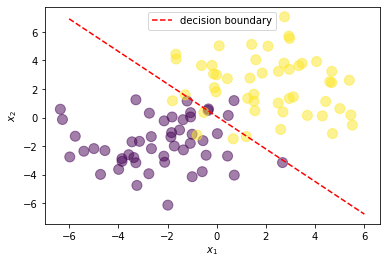

In [10]:
print ( "Final gradient descend, adam:", w_adam )
# plot the data and separating line
plt.scatter(x_data[:,0], x_data[:,1], c=y_data.reshape(100), s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -(w_adam1[0] + x_axis*w_adam0[0][0]) / w_adam0[0][1]
line_up, = plt.plot(x_axis, y_axis,'r--', label='decision boundary')
plt.legend(handles=[line_up])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.savefig ( "example.png" )